# Image Segmentation Techniques
## Region Growing & Self-Supervised Segmentation

This notebook demonstrates the implementation and comparison of two image segmentation techniques:

1. Region Growing (Traditional Method)
2. Self-Supervised Segmentation (Deep Learning Method)

The objective is to understand how each method segments images and to analyze their performance, strengths, and limitations.


## 1. Introduction

Image segmentation is a computer vision technique used to divide an image into meaningful regions.

Instead of analyzing the whole image at once, segmentation allows us to isolate objects or areas of interest.

This is important in applications such as:

- Medical imaging
- Object detection
- Satellite imagery
- Industrial inspection

In this notebook, we explore both a classical pixel-based method and a modern AI-based method.


## 2. Region Growing Segmentation

Region Growing is a traditional image segmentation technique that groups pixels based on similarity.

It begins with a selected pixel called a **seed point** and expands outward by adding neighboring pixels that have similar intensity values.

### Key Idea

Pixels are added to the region if:

- They are close to the seed
- Their intensity difference is below a defined threshold

This method works best on grayscale images with clear intensity differences.


In [ ]:
!pip install lightly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.3/859.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.6/165.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.3/857.3 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 53.9 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as T
from sklearn.cluster import KMeans


## 3. Libraries Used

The following libraries were used:

- OpenCV → Image processing
- NumPy → Numerical operations
- Matplotlib → Image visualization

These tools allow efficient image loading, processing, and display.


## 4. Load Test Image

We load a grayscale image to demonstrate Region Growing segmentation.

Grayscale is preferred because segmentation is based on pixel intensity rather than color.

The test image contains distinct regions that allow us to observe the segmentation process clearly.


In [ ]:
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png -O lena.png


--2026-02-17 13:12:07--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 462.73K  --.-KB/s    in 0.1s    

2026-02-17 13:12:07 (3.81 MB/s) - ‘lena.png’ saved [473831/473831]



(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

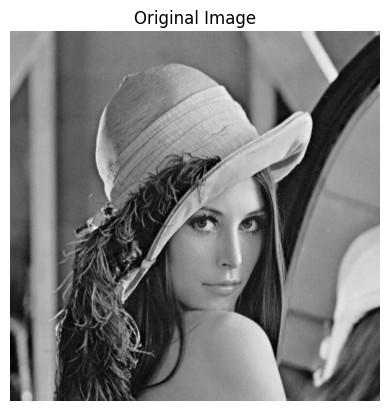

In [ ]:
image = cv2.imread('lena.png', 0)

plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')



## 5. Region Growing Implementation

The Region Growing algorithm was implemented using a custom function.

### Steps Performed:

1. Get image dimensions
2. Initialize segmented output image
3. Track visited pixels
4. Start from seed point
5. Compare neighboring pixel intensities
6. Add similar pixels to the region

The process continues until no more pixels satisfy the similarity condition.


## Region Growing Segmentation
Region growing expands pixels from a seed point
based on intensity similarity.


In [ ]:
def region_growing(img, seed, threshold):

    h, w = img.shape
    segmented = np.zeros((h, w), np.uint8)
    visited = np.zeros((h, w), bool)

    stack = [seed]

    while stack:
        x, y = stack.pop()

        if visited[x, y]:
            continue

        if abs(int(img[x, y]) - int(img[seed])) < threshold:
            segmented[x, y] = 255
            visited[x, y] = True

            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < h and 0 <= ny < w:
                        stack.append((nx, ny))

    return segmented


## 6. Apply Region Growing

We now apply the Region Growing algorithm using:

- A selected seed point
- An intensity threshold

The threshold controls how similar neighboring pixels must be to join the region.


In [ ]:
seed_point = (100, 100)
threshold = 10

segmented = region_growing(image, seed_point, threshold)



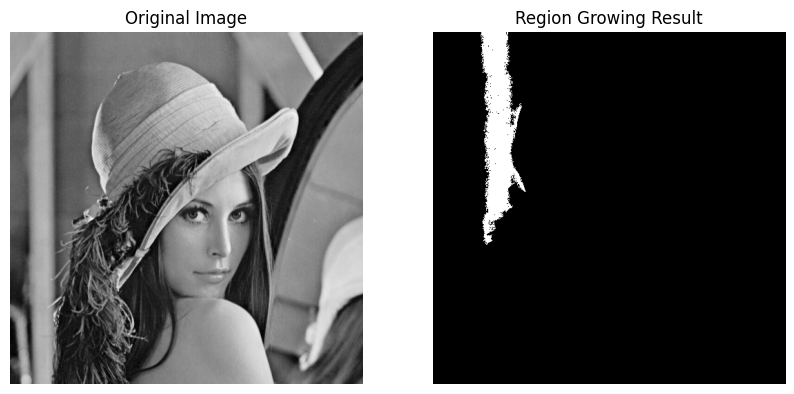

In [ ]:
plt.figure(figsize=(10,5))

# Original
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Segmented
plt.subplot(1,2,2)
plt.imshow(segmented, cmap='gray')
plt.title("Region Growing Result")
plt.axis('off')

plt.show()


## 8. Self Supervised Segmentation (SSL)

Self-Supervised Segmentation is a deep learning approach that does not require labeled datasets.

Instead of relying on pixel intensity, SSL models learn visual features automatically from images.

We demonstrate this using a pretrained SSL backbone (e.g., DINO).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
import timm
from sklearn.cluster import KMeans
from skimage import io, color
from skimage.segmentation import mark_boundaries

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"Using device: {device}")
print("Libraries imported succesfully")

Using device: cpu
Libraries imported succesfully


## 9. Libraries for SSL

For the Self-Supervised Learning segmentation task, I first imported all the required libraries.

I used NumPy for numerical operations and Matplotlib for visualization. PIL and Scikit-image were used to load and process the image.

PyTorch and Torchvision handled tensor processing and image preprocessing, while the timm library provided the pretrained DINO model for feature extraction.

Finally, I applied KMeans clustering from Scikit-learn to group similar features and produce the segmented image. I also set the device to GPU if available for faster computation.



## 10. Loaded the pretrained Self-Supervised Learning mode

Loaded pretrained vit_small_patch16_224.dino
Model type: Vision Transformer (ViT)
Trained using: Self-supervised learning (DINO)

Images are passed through the pretrained SSL backbone to extract embeddings.

Embeddings are numerical representations of visual patterns such as:

- Texture
- Shape
- Edges
- Structures

These features are later used for clustering-based segmentation.


In [3]:
model_name = 'vit_small_patch16_224.dino'

try:
    model = timm.create_model(model_name, pretrained=True)
    model.eval()
    model = model.to(device)

    print(f"Loaded pretrained {model_name}")
    print("Model type: Vision Transformer (ViT)")
    print("Trained using: Self-supervised learning (DINO)")

except Exception as e:
    print(f"Error loading model: {e}")
    print("Installing timm library...")

    import os
    os.system('pip install timm')

    model = timm.create_model(model_name, pretrained=True)
    model.eval()
    model = model.to(device)

    print(f"Loaded pretrained {model_name}")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/86.7M [00:00<?, ?B/s]

Loaded pretrained vit_small_patch16_224.dino
Model type: Vision Transformer (ViT)
Trained using: Self-supervised learning (DINO)


## 11.Image loaded successfully
Grayscale image shape: (660, 550)
RGB image shape: (660, 550, 3)

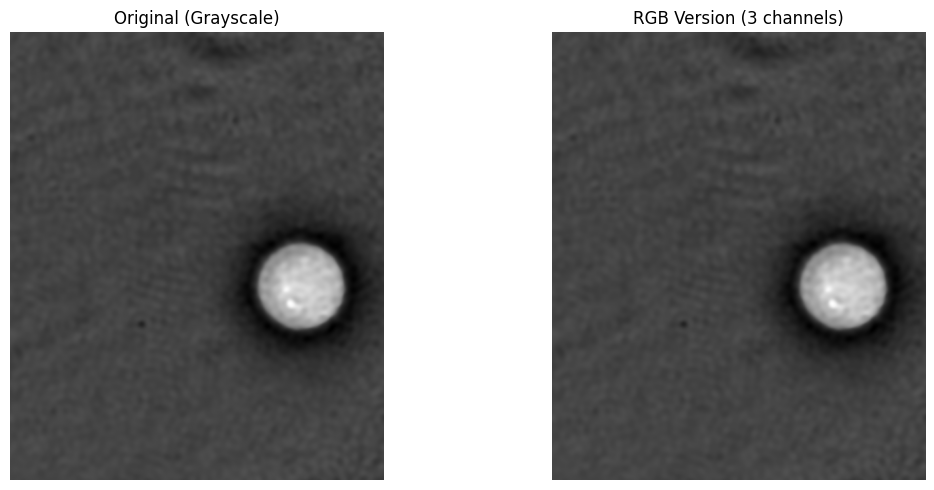

Image loaded successfully!
Grayscale image shape: (660, 550)
RGB image shape: (660, 550, 3)


In [4]:
from skimage import data

img = data.cell()

if len(img.shape) == 2:
    img_rgb = np.stack([img, img, img], axis=2)
else:
    img_rgb = img

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original (Grayscale)')
axes[0].axis('off')

axes[1].imshow(img_rgb)
axes[1].set_title('RGB Version (3 channels)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Image loaded successfully!")
print(f"Grayscale image shape: {img.shape}")
print(f"RGB image shape: {img_rgb.shape}")



Transform Image

In [5]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

img_tensor = transform(img_rgb).unsqueeze(0).to(device)
print("Image preprocessed for model")

Image preprocessed for model


Extract Features

In [6]:
with torch.no_grad():
    features = model.forward_features(img_tensor)

    patch_features = features[:, 1:, :]

    num_patches = int(np.sqrt(patch_features.shape[1]))
    feature_dim = patch_features.shape[2]

    features_2d = patch_features.reshape(1, num_patches, num_patches, feature_dim)
    features_2d = features_2d.squeeze(0).cpu().numpy()

print("Features extracted successfully!")
print(f"Feature map shape: {features_2d.shape}")
print("\nThese features encode:")
print("  - Edges, textures, shapes learned WITHOUT labels")
print("  - Semantic information about objects")
print("  - Spatial relationships")


Features extracted successfully!
Feature map shape: (14, 14, 384)

These features encode:
  - Edges, textures, shapes learned WITHOUT labels
  - Semantic information about objects
  - Spatial relationships


Features extracted successfully!
Feature map shape: (14, 14, 384)

These features encode:
  - Edges, textures, shapes learned WITHOUT labels
  - Semantic information about objects
  - Spatial relationships

In [7]:
# Cluster features based on pixel similarity

h, w, d = features_2d.shape
features_flat = features_2d.reshape(-1, d)  # Flatten to [num_patches, feature_dim]

n_segments = 3

print(f"Clustering into {n_segments} segments...")

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_segments, random_state=42, n_init=10)
segment_labels = kmeans.fit_predict(features_flat)

# Reshape back to spatial grid
segmentation = segment_labels.reshape(h, w)

# Resize segmentation to original image size
from skimage.transform import resize
segmentation_resized = resize(
    segmentation,
    img.shape[:2],
    order=0,
    preserve_range=True,
    anti_aliasing=False
).astype(int)

print(f"Segmentation complete!")
print(f"Found {n_segments} segments")
print(f"Segment distribution:")
for i in range(n_segments):
    count = np.sum(segmentation_resized == i)
    percentage = (count / segmentation_resized.size) * 100
    print(f"  Segment {i}: {count} pixels ({percentage:.1f}%)")


Clustering into 3 segments...
Segmentation complete!
Found 3 segments
Segment distribution:
  Segment 0: 86997 pixels (24.0%)
  Segment 1: 205636 pixels (56.6%)
  Segment 2: 70367 pixels (19.4%)


## 12. Segmentation Result SSL

The SSL method segments the image based on learned visual structures rather than raw intensity.

### Observations:

- Captures complex shapes
- Works well on natural images
- Requires pretrained models


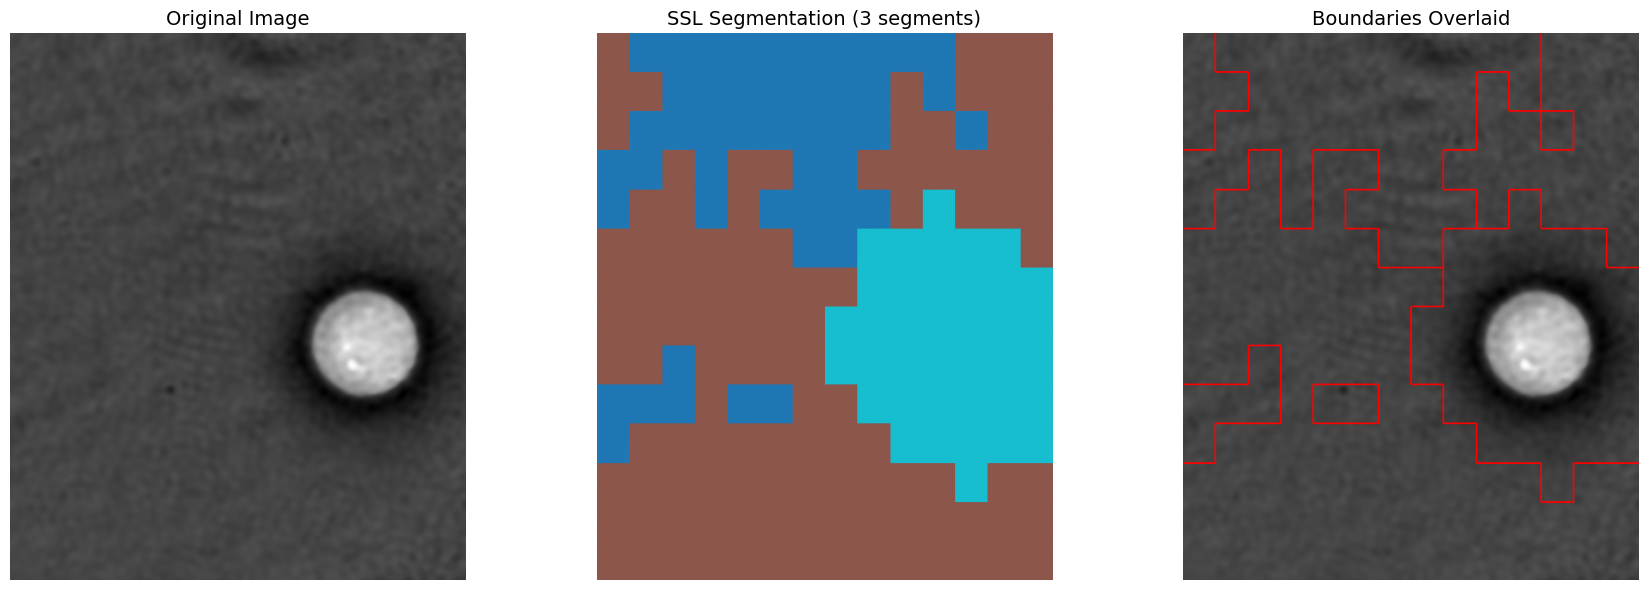

  - Left: Original cell image
  - Middle: Different colors = different segments (learned WITHOUT labels)
  - Right: Segment boundaries in red


In [8]:
# Visualize Segmentation Results

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Original image
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image', fontsize=14)
axes[0].axis('off')

# 2. Segmentation mask (colored regions)
axes[1].imshow(segmentation_resized, cmap='tab10')
axes[1].set_title(f'SSL Segmentation ({n_segments} segments)', fontsize=14)
axes[1].axis('off')

# 3. Segmentation boundaries overlaid on original
img_with_boundaries = mark_boundaries(
    img if len(img.shape) == 2 else img,
    segmentation_resized,
    color=(1, 0, 0),
    mode='thick'
)
axes[2].imshow(img_with_boundaries, cmap='gray' if len(img.shape) == 2 else None)
axes[2].set_title('Boundaries Overlaid', fontsize=14)
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("  - Left: Original cell image")
print("  - Middle: Different colors = different segments (learned WITHOUT labels)")
print("  - Right: Segment boundaries in red")

## 14. Conclusion

This notebook explored two segmentation techniques:

- Region Growing   simple and intensity-based
- Self-Supervised Segmentation  feature-based and AI-driven

Region Growing is easy to implement but sensitive to thresholds.

SSL segmentation is more powerful but computationally intensive.

Both approaches highlight important concepts in image segmentation.
